# 1. 데이터로드

In [2]:
from glob import glob
glob('../data/2_paper_info/paper_information*')

['../data/2_paper_info\\paper_information_2011.csv',
 '../data/2_paper_info\\paper_information_2012.csv',
 '../data/2_paper_info\\paper_information_2013.csv',
 '../data/2_paper_info\\paper_information_2014.csv',
 '../data/2_paper_info\\paper_information_2015.csv',
 '../data/2_paper_info\\paper_information_2019.csv',
 '../data/2_paper_info\\paper_information_2020.csv']

In [49]:
import pandas as pd
file_raw = glob('../data/2_paper_info/paper_information*')

each_file = []
for i in range(len(file_raw)):
    each_file.append(pd.read_csv(file_raw[i], encoding='utf-8'))

total_file = pd.concat(each_file, ignore_index=True) # 기존인덱스무시
each_file

[                                              citation  \
 0               Int J Mol Sci. 2011; 12(5): 3205–3219.   
 1               Int J Mol Sci. 2011; 12(2): 1410–1430.   
 2                   BMC Bioinformatics. 2011; 12: 245.   
 3             Protein Sci. 2011 Aug; 20(8): 1285–1297.   
 4        J Cell Biochem. 2011 Nov; 112(11): 3256–3267.   
 ..                                                 ...   
 750       Biochemistry. 2011 Apr 5; 50(13): 2672–2682.   
 751  Birth Defects Res C Embryo Today. 2011 Mar; 93...   
 752         Pharmacol Ther. 2011 Aug; 131(2): 221–241.   
 753        Cardiovasc Res. 2011 Sep 1; 91(4): 703–710.   
 754  Am J Physiol Heart Circ Physiol. 2011 Oct; 301...   
 
                                   doi       PMCID        PMID  \
 0                10.3390/ijms12053205  PMC3116186  21686180.0   
 1                10.3390/ijms12021410  PMC3083713  21541066.0   
 2            10.1186/1471-2105-12-245  PMC3212983  21682902.0   
 3                     10.

In [50]:
len(total_file), len(each_file), len(each_file[0]), len(each_file[1])

(10322, 7, 755, 950)

In [51]:
each_file[0].info() # 9개 컬럼.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 755 entries, 0 to 754
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   citation  755 non-null    object 
 1   doi       750 non-null    object 
 2   PMCID     755 non-null    object 
 3   PMID      751 non-null    float64
 4   Title     755 non-null    object 
 5   Author    752 non-null    object 
 6   Belong    750 non-null    object 
 7   Abstract  751 non-null    object 
 8   Keywords  371 non-null    object 
dtypes: float64(1), object(8)
memory usage: 53.2+ KB


In [52]:
each_file[0]['citation'] # .로 분리하면 될듯?

0                 Int J Mol Sci. 2011; 12(5): 3205–3219.
1                 Int J Mol Sci. 2011; 12(2): 1410–1430.
2                     BMC Bioinformatics. 2011; 12: 245.
3               Protein Sci. 2011 Aug; 20(8): 1285–1297.
4          J Cell Biochem. 2011 Nov; 112(11): 3256–3267.
                             ...                        
750         Biochemistry. 2011 Apr 5; 50(13): 2672–2682.
751    Birth Defects Res C Embryo Today. 2011 Mar; 93...
752           Pharmacol Ther. 2011 Aug; 131(2): 221–241.
753          Cardiovasc Res. 2011 Sep 1; 91(4): 703–710.
754    Am J Physiol Heart Circ Physiol. 2011 Oct; 301...
Name: citation, Length: 755, dtype: object

In [53]:
print(each_file[0]['citation'][0].split('.'))
each_file[0]['citation'][0].split('.')[0] # 저널이름
each_file[0]['citation'][0].split('.')[1].split(';')[0].lstrip() # 년도

['Int J Mol Sci', ' 2011; 12(5): 3205–3219', '']


'2011'

In [110]:
journal = []
date_year_raw = []
for i in range(len(total_file)):
    tmp = total_file['citation'][i].split('.')
    journal.append(tmp[0]) # 저널이름
    date_year_raw.append(tmp[1].split(';')[0].lstrip())
    
len(journal), len(date_year_raw)

(10322, 10322)

In [111]:
date_year_raw # 잡다하게 섞여있네? 전처리 ㄱㄱ

['2011',
 '2011',
 '2011',
 '2011 Aug',
 '2011 Nov',
 '2011',
 '2011 Apr 1',
 '2012 Jan',
 '2011 Sep',
 '2011 Apr 13',
 '2011 Jan-Mar',
 '2011 Jun',
 '2011 May',
 '2011',
 '2012 Jan',
 '2011 Mar',
 '2011 Nov',
 '2011 Aug',
 '2011 Sep 21',
 '2011',
 '2011',
 '2011 Jun 8',
 '2011 Jun 17',
 '2011 Feb',
 '2011 May 13',
 '2011 Oct 5',
 '2011 Jul',
 '2011',
 '2011 Dec',
 '2011 Mar 2',
 '2011 Jul 8',
 '2011',
 '2012 Jan',
 '2012 Jan 6',
 '2011 Jan 7',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011 Jun',
 '2011',
 '2011 Jun',
 '2011 Dec',
 '2011 Jan-Mar',
 '2011',
 '2011 Apr',
 '2012 Feb',
 '2011 Sep',
 '2011 Apr-Jun',
 '2011 Apr',
 '2011',
 '2011 Feb',
 '2012 Feb',
 '2011 Jun 21',
 '2011',
 '2011 Nov 2',
 '2011 Nov 11',
 '2012 Jan',
 '2011',
 '2011 Jul',
 '2011 Oct 5',
 '2011 Apr 22',
 '2011',
 '2012 Jan',
 '2011 Aug 26',
 '2011 Aug 26',
 '2011 Oct 21',
 '2011 Apr 15',
 '2011 Oct 19',
 '2011 Nov',
 '2012 Jan',
 '2011',
 '2011 Jul 19',
 '2011',
 '2011',
 '2012 Feb 15',
 '2012 Jan',
 '2011

In [136]:
import re
re.findall(r"^20\d\d*",date_year_raw[0])

['2011']

In [137]:
import re
date_year = []
for i in range(len(date_year_raw)):
    date_year.append(''.join(re.findall(r"^20\d\d*",date_year_raw[i]))) # list -> 숫자로 저장하려고 join 씀
date_year

['2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2012',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 '2011',
 

In [172]:
df = pd.DataFrame({
    'year':date_year
    ,'citation':journal
})
df.info() 
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10322 entries, 0 to 10321
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   year      10322 non-null  object
 1   citation  10322 non-null  object
dtypes: object(2)
memory usage: 161.4+ KB


,year,citation
0,2011,Int J Mol Sci
1,2011,Int J Mol Sci
2,2011,BMC Bioinformatics
3,2011,Protein Sci
4,2011,J Cell Biochem
...,...,...
10317,2020,Phys Rev E
10318,2020,Protein Cell
10319,2020,Theranostics
10320,2020,Theranostics


In [173]:
pd.unique(df['year']) #'' 제거하자

array(['2011', '2012', '2010', '2013', '', '2014', '2015', '2016', '2019',
       '2020', '2018', '2021'], dtype=object)

In [174]:
df[df['year'] == ''].head() # 흠.. 년도가 '' 로 되어있는건뭐지?

,year,citation
1360,,Phys Biol
1396,,Infect Disord Drug Targets
1653,,Endocr Rev
1814,,Version 1
1829,,Version 1


In [175]:
total_file.iloc[1360] # df['year']==''로 된애들은 9(.)로 되어있는애들인가? 무시하면될듯

citation       Phys Biol. 9(1): 10.1088/1478-3975/9/1/014001.
doi                              10.1088/1478-3975/9/1/014001
PMCID                                              PMC3783528
PMID                                               2.2315e+07
Title       The Importance of Slow Motions for Protein Fun...
Author      Aris Skliros;Michael T. Zimmermann;Debkanta Ch...
Belong      1L. H. Baker Center for Bioinformatics and Bio...
Abstract    Loops in proteins connect secondary structures...
Keywords                                                  NaN
Name: 1360, dtype: object

In [176]:
len(df) - len(df[df['year']!='']) # 44개가 날짜 이상한애들

44

In [184]:
df_real = df[df['year']!=''].copy()
len(df_real)

10278

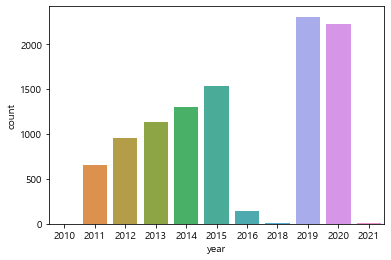

In [185]:
# 년도별 저널 수
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'C:\Windows\Fonts\malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

import seaborn as sns

sns.countplot(
    x='year'
    ,data=df_real
)
plt.show() 

In [189]:
total = 0
for i in range(2010,2022):
    n = len(df[df['year']==str(i)])
    print(f'{i}년 {n}개')
    total += n
print(total)
# 전체개수 - 년도가 9(.)로 나온거 뻄
total == (len(total_file) - len(df[df['year']==''])) 

2010년 2개
2011년 656개
2012년 958개
2013년 1136개
2014년 1297개
2015년 1539개
2016년 144개
2017년 0개
2018년 7개
2019년 2307개
2020년 2226개
2021년 6개
10278


True

In [208]:
# 저널별 논문 수
df_real.groupby('citation').head()

,year,citation
0,2011,Int J Mol Sci
1,2011,Int J Mol Sci
2,2011,BMC Bioinformatics
3,2011,Protein Sci
4,2011,J Cell Biochem
...,...,...
10312,2020,J Cancer
10314,2020,MicroPubl Biol
10315,2020,Pac Symp Biocomput
10316,2020,Pac Symp Biocomput


In [209]:
df_groupby_journal = pd.DataFrame({
    'citation':df_real['citation']
    ,'n':1
})
df_groupby_journal

,citation,n
0,Int J Mol Sci,1
1,Int J Mol Sci,1
2,BMC Bioinformatics,1
3,Protein Sci,1
4,J Cell Biochem,1
...,...,...
10317,Phys Rev E,1
10318,Protein Cell,1
10319,Theranostics,1
10320,Theranostics,1


In [223]:
top10 = df_groupby_journal.groupby('citation').agg({'n':"sum"}).reset_index().sort_values(by='n', ascending=False).head(10)
top10

,citation,n
937,PLoS One,602
604,J Biol Chem,549
984,Proc Natl Acad Sci U S A,433
1026,Sci Rep,367
567,Int J Mol Sci,355
916,Nucleic Acids Res,325
876,Nat Commun,265
202,Biophys J,255
159,Biochemistry,169
1116,eLife,167


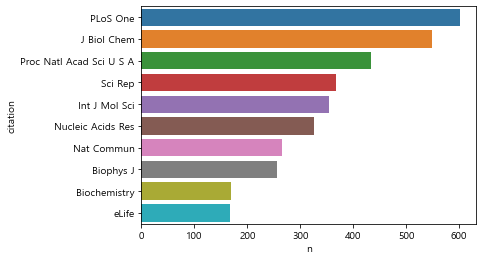

In [228]:
# 저널별 논문의 수
sns.barplot(
    x='n'
    ,y='citation'
    ,data=top10
)
plt.show()